In [1]:
from UtilDatasetPrepFromLORE import *
from Rankers import *
from PreferentialSampling import *
from UniformSampling import *
from StandardEval import *
from FairnessEval import *
from Explainers import *

22-Feb-13 19:17:31 fatf.utils.array.tools INFO     Using numpy's numpy.lib.recfunctions.structured_to_unstructured as fatf.utils.array.tools.structured_to_unstructured and fatf.utils.array.tools.structured_to_unstructured_row.


# GERMAN

## Uniform Sampling

In [2]:
filename = 'german_credit.csv'
path_res = '/Users/Marta/FAccT/Res-GERMAN/'
path_data = 'datasets/'
sensitive = ['foreign_worker'] #OR personal_status_sex
discrete, df = prepare_german_dataset(filename, path_data, sensitive)
discrete

['credits_this_bank',
 'job',
 'people_under_maintenance',
 'housing',
 'other_installment_plans',
 'purpose',
 'account_check_status',
 'property',
 'savings',
 'personal_status_sex',
 'other_debtors',
 'telephone',
 'credit_history',
 'present_emp_since',
 'present_res_since',
 'installment_as_income_perc']

In [3]:
target = 'target'
column_names = df.columns.values.tolist()
column_names.remove(target)
class_names=['Good','Bad']
#There are two classes, 1 for good customers and 2 for bad customers
#in LORE 0 sta per 1 e 1 sta per 2, quindi 0 è good e 1 è bad  
adClass=0
disClass=1
protected = ['foreign_worker_no','foreign_worker_yes']
protected_feature='foreigners' 
non_sensitive = [elem for elem in column_names if elem not in protected]
adAttr=None
disAttr=None

In [4]:
discrete.append('foreign_worker_no')
discrete.append('foreign_worker_yes')
discrete.append('target')
df_Discrete = df.loc[:, df.columns.isin(discrete)]
df_Discrete

,target,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker_no,foreign_worker_yes
0,0,1,1,4,4,0,3,3,2,3,2,1,1,1,1,0,1,0,1
1,1,0,3,4,1,2,1,0,2,1,2,1,1,0,1,0,0,0,1
2,0,3,1,0,1,3,1,3,2,2,2,1,1,0,3,1,0,0,1
3,0,1,3,7,1,3,1,3,1,3,0,1,0,0,1,1,0,0,1
4,1,1,2,2,1,2,2,3,2,3,3,1,0,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,3,3,7,1,3,2,0,2,3,2,1,1,0,3,0,0,0,1
996,0,1,3,3,1,2,3,1,2,3,0,1,1,0,0,0,1,0,1
997,0,3,3,4,1,0,3,3,2,3,1,1,1,0,1,0,0,0,1
998,1,1,3,4,1,2,3,3,2,3,3,1,0,0,1,0,1,0,1


In [5]:
from sklearn.preprocessing import StandardScaler

df_ToScale = df.loc[:, ~df.columns.isin(discrete)]
df_ToScale

scaler = StandardScaler()

df_ToScale = scaler.fit_transform(df_ToScale)
df_ToScale = pd.DataFrame(df_ToScale)
df_ToScale.columns = range(0, df_ToScale.columns.size)
df_ToScale.columns = ['duration_in_month','credit_amount','age']
df_ToScale

,duration_in_month,credit_amount,age
0,-1.236478,-0.745131,2.766456
1,2.248194,0.949817,-1.191404
2,-0.738668,-0.416562,1.183312
3,1.750384,1.634247,0.831502
4,0.256953,0.566664,1.535122
...,...,...,...
995,-0.738668,-0.544162,-0.399832
996,0.754763,0.207612,0.391740
997,-0.738668,-0.874503,0.215835
998,1.999289,-0.505528,-1.103451


In [6]:
df = pd.concat([df_ToScale.reset_index(drop=True), df_Discrete.reset_index(drop=True)], axis= 1)
df

,duration_in_month,credit_amount,age,target,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,...,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker_no,foreign_worker_yes
0,-1.236478,-0.745131,2.766456,0,1,1,4,4,0,3,...,3,2,1,1,1,1,0,1,0,1
1,2.248194,0.949817,-1.191404,1,0,3,4,1,2,1,...,1,2,1,1,0,1,0,0,0,1
2,-0.738668,-0.416562,1.183312,0,3,1,0,1,3,1,...,2,2,1,1,0,3,1,0,0,1
3,1.750384,1.634247,0.831502,0,1,3,7,1,3,1,...,3,0,1,0,0,1,1,0,0,1
4,0.256953,0.566664,1.535122,1,1,2,2,1,2,2,...,3,3,1,0,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.738668,-0.544162,-0.399832,0,3,3,7,1,3,2,...,3,2,1,1,0,3,0,0,0,1
996,0.754763,0.207612,0.391740,0,1,3,3,1,2,3,...,3,0,1,1,0,0,0,1,0,1
997,-0.738668,-0.874503,0.215835,0,3,3,4,1,0,3,...,3,1,1,1,0,1,0,0,0,1
998,1.999289,-0.505528,-1.103451,1,1,3,4,1,2,3,...,3,3,1,0,0,1,0,1,0,1


In [7]:
X,Y,X_blind,X_train,X_test,y_train,y_test,df=prepare_for_sampling(df,protected)

In [8]:
findFreq(target,protected,df)

({'foreign_worker_no': 22, 'foreign_worker_yes': 464},
 {'foreign_worker_no': 3, 'foreign_worker_yes': 211})

In [9]:
df_new=UniformSampling(target,protected,df,adClass,disClass,adAttr,disAttr)

Counting labels = 0  {'foreign_worker_no': 22, 'foreign_worker_yes': 464}
Counting labels = 1  {'foreign_worker_no': 3, 'foreign_worker_yes': 211}
DN  ('foreign_worker_yes', 211)
FP  ('foreign_worker_no', 22)
DP  ('foreign_worker_yes', 464)
FN  ('foreign_worker_no', 3)
Len DN_df  211
Len FP_df  22
Len DP_df  464
Len FN_df  3
Len restData 0
DN_expected  206
5 to be removed
Len DN_df after sampling  206
FP_expected  17
5 to be removed
Len FP_df after sampling  17
DP_expected  469
5 to add
Len DP_df after sampling  469
FN_expected  8
5 to add
Len FN_df after sampling  8


elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


In [10]:
findFreq(target,protected,df_new)

({'foreign_worker_no': 17, 'foreign_worker_yes': 469},
 {'foreign_worker_no': 8, 'foreign_worker_yes': 206})

In [11]:
X_train,X_train_blind,X_train_mod,X_train_mod_blind,y_train_mod,X_test,X_test_blind=prepare_for_classification(df_new,X_train,X_test,column_names,protected,False)

### MLP

In [12]:
clf = MLPClassifier()
param_grid = dict(hidden_layer_sizes=[(50, 50, 50), (50, 100, 50)],
                          activation=['tanh', 'relu'],
                          solver=['sgd', 'adam'],
                          alpha=[0.0001, 0.05],
                          learning_rate=['constant', 'adaptive']
                          )

In [13]:

clfOrig,clfOrigBlind,clfMit,clfMitBlind,res = Classifiers(clf,param_grid,target,column_names,X_train,X_train_mod,X_train_blind,X_train_mod_blind,y_train,y_train_mod,X_test,X_test_blind,y_test,protected,adClass,disClass,adAttr,disAttr)
res.to_csv(path_or_buf=path_res+'US_MLP_Performances.csv')
res

Original Train Dimension = 700
Mitigated Train Dimension = 700
Test Dimension = 300


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer

---> CLF Original: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 229 ]
---> CLF Mitigated: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 237 ]
---> CLF Original Blind: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 221 ]
---> CLF Mitigated Blind: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 224 ]


,CLF Original,CLF Original Blind,CLF Mitigated,CLF Mitigated Blind,Best Score,Delta O-OB,Delta M-MB,Delta O-M,Delta OB-MB
F1 Score,0.482759,0.483660,0.423358,0.493333,CLF Mitigated Blind,0.000902,0.069976,0.059401,0.009673
Discrimination,0.204861,0.232639,0.177083,0.222222,CLF Mitigated,0.027778,0.045139,0.027778,0.010417


In [14]:

PIK = "US_Clfs_MLP.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump([clfOrig,clfOrigBlind,clfMit,clfMitBlind], f)

In [15]:
PIK = "US_Clfs_MLP.dat"
with open(path_res+"/"+PIK, "rb") as f:
  clfOrig,clfOrigBlind,clfMit,clfMitBlind = pickle.load(f)
clfs={'clfOrig':clfOrig,'clfOrigBlind':clfOrigBlind,'clfMit':clfMit,'clfMitBlind':clfMitBlind}

In [16]:
res = pd.read_csv(path_res+'US_MLP_Performances.csv',index_col=0)
res = res.round(3)
res.to_csv(path_res+'US_MLP_Performances.csv')
res

,CLF Original,CLF Original Blind,CLF Mitigated,CLF Mitigated Blind,Best Score,Delta O-OB,Delta M-MB,Delta O-M,Delta OB-MB
F1 Score,0.483,0.484,0.423,0.493,CLF Mitigated Blind,0.001,0.070,0.059,0.01
Discrimination,0.205,0.233,0.177,0.222,CLF Mitigated,0.028,0.045,0.028,0.01


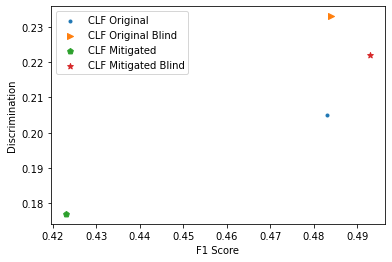

In [17]:
plotDisc(res)

In [18]:
FATInput=DataDescription(X_test,y_test,class_names,column_names,protected,protected_feature)

The grouping based on the *foreigners* feature has the following distribution:
    * "('foreign_worker_no',)" grouping has 12 instances.
    * "('foreign_worker_yes',)" grouping has 288 instances.

The class distribution per sub-population:
    * For the "('foreign_worker_no',)" grouping the classes are distributed as follows:
        - The class *Good* has 11 data points.
        - The class *Bad* has 1 data points.
    * For the "('foreign_worker_yes',)" grouping the classes are distributed as follows:
        - The class *Good* has 203 data points.
        - The class *Bad* has 85 data points.


In [19]:
resDisparateImp=disparateImpactMetrics(clfs,FATInput,X_test,X_test_blind,y_test,protected_feature)
resDisparateImp

The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fairness metric for *foreigners* feature split are:
The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fairness metric for *foreigners* feature split are:
The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fairness metric for *foreigners* feature split are:
The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fair

{'Equal Accuracy': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Equal Opportunity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Demographic Parity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []}}

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


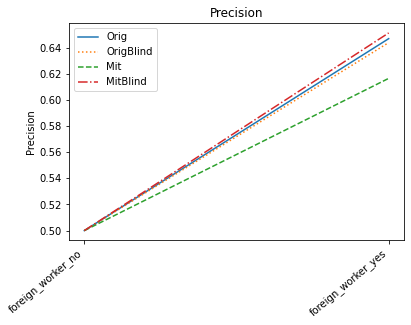

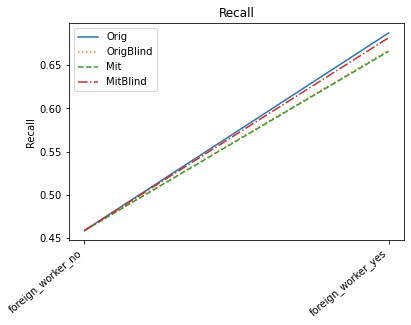

In [20]:
standardMetricsPerGroup(clfs,column_names,target,X_test,y_test,protected_feature,protected)

#### XAI Fixed Reference Set

##### SHAP Kernel Explainer

In [21]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [22]:
PIK = "US_MLP_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [4]:
PIK = "US_MLP_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [5]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

""


In [6]:
XAIMean

,clfOrig-clfOrigBlind,clfMit-clfMitBlind,clfOrig-clfMit,clfOrigBlind-clfMitBlind
account_check_status,0.007345,0.024006,0.011969,0.009866
duration_in_month,0.021049,0.020673,0.010860,0.010024
credit_history,0.006972,0.006449,0.007107,0.007520
purpose,0.014256,0.013784,0.009869,0.010825
credit_amount,0.021721,0.011486,0.025959,0.008894
savings,0.011138,0.012058,0.012600,0.011543
present_emp_since,0.009287,0.007864,0.008845,0.007952
installment_as_income_perc,0.011858,0.008606,0.015887,0.006112
personal_status_sex,0.008498,0.008889,0.010677,0.010354
other_debtors,0.006338,0.010640,0.016248,0.007479


In [7]:
EValues = computeE(shap_v,column_names)
EValues 

,E
clfOrig-clfOrigBlind,0.011
clfMit-clfMitBlind,0.010
clfOrig-clfMit,0.012
clfOrigBlind-clfMitBlind,0.007


In [8]:
resSHAP = pd.read_csv(path_res+'US_MLP_ResSHAP_Fix.csv',index_col=0)
resSHAP.to_csv(path_or_buf=path_res+'US_MLP_ResSHAP_Fix.csv')
resSHAP

,clfOrig-clfOrigBlind,clfMit-clfMitBlind,clfOrig-clfMit,clfOrigBlind-clfMitBlind
SA-Sum,0.001,0.000,0.002,0.002
SA-Mean,0.000,0.000,0.000,0.000
NSA-Sum,0.749,0.081,0.609,0.190
NSA-Mean,0.003,0.001,0.004,0.002


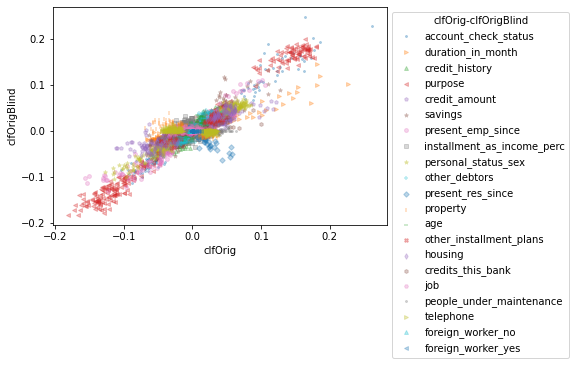

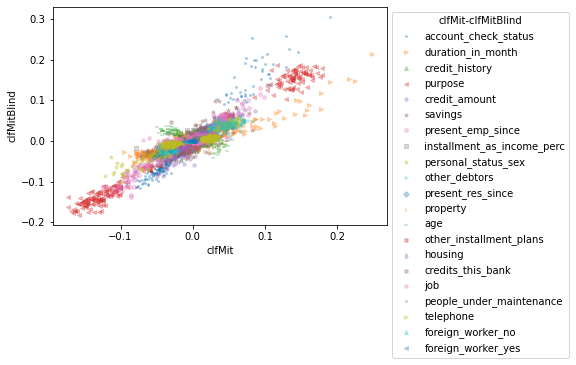

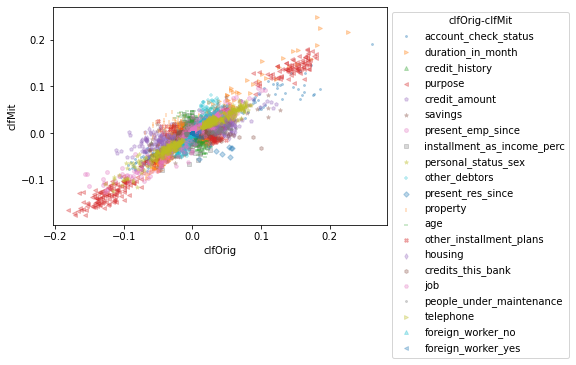

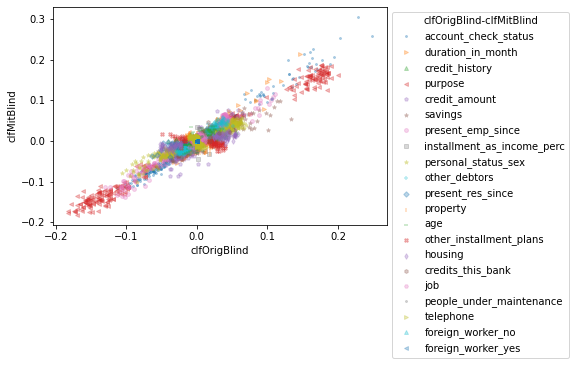

In [30]:
XAIPlots(shap_v,column_names,diffClfs=True)

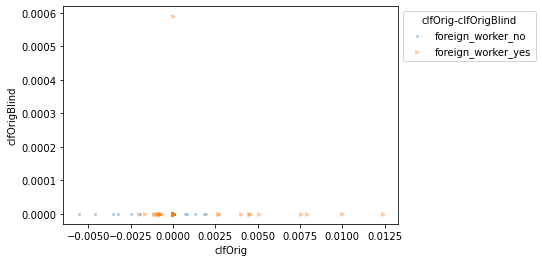

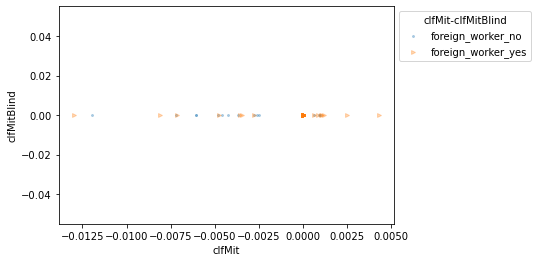

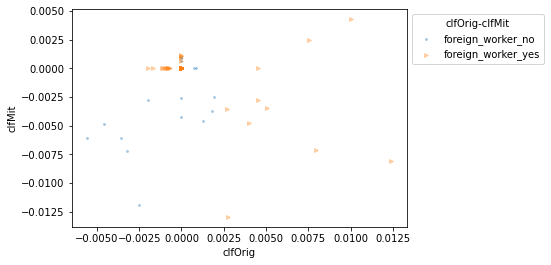

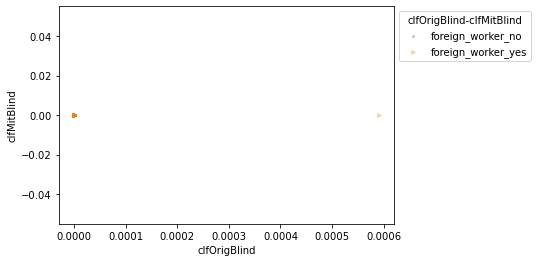

In [31]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [ ]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [ ]:
PIK = "US_MLP_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [ ]:
PIK = "US_MLP_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

In [ ]:
XAIMean

In [ ]:
EValues = computeE(lime_v,column_names)
EValues 

In [ ]:
resLIME = pd.read_csv(path_res+'US_MLP_ResLIME_Fix.csv',index_col=0)
resLIME = resLIME.round(3)
resLIME.to_csv(path_or_buf=path_res+'US_MLP_ResLIME_Fix.csv')
resLIME

In [ ]:
XAIPlots(lime_v,column_names,diffClfs=True)

In [ ]:
XAIPlots(lime_v,protected,diffClfs=True)

#### XAI Changing Reference Set

##### SHAP Kernel Explainer

In [ ]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [ ]:
PIK = "US_MLP_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [ ]:
PIK = "US_MLP_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

In [ ]:
XAIMean

In [ ]:
EValues = computeE(shap_v,column_names)
EValues 

In [ ]:
resSHAP = pd.read_csv(path_res+'US_MLP_ResSHAP_Change.csv',index_col=0)
resSHAP = resSHAP.round(3)
resSHAP.to_csv(path_or_buf=path_res+'US_MLP_ResSHAP_Change.csv')
resSHAP

In [ ]:
XAIPlots(shap_v,column_names,diffClfs=True)

In [ ]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [ ]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [ ]:
PIK = "US_MLP_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [ ]:
PIK = "US_MLP_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

In [ ]:
XAIMean

In [ ]:
EValues = computeE(lime_v,column_names)
EValues 

In [ ]:
resLIME = pd.read_csv(path_res+'US_MLP_ResLIME_Change.csv',index_col=0)
resLIME = resLIME.round(3)
resLIME.to_csv(path_or_buf=path_res+'US_MLP_ResLIME_Change.csv')
resLIME

In [ ]:
XAIPlots(lime_v,column_names,diffClfs=True)

In [ ]:
XAIPlots(lime_v,protected,diffClfs=True)

#### Comparison

##### SHAP Kernel Explainer

In [ ]:
PIK = "US_MLP_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_fix = pickle.load(f)

In [ ]:
PIK = "US_MLP_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_change = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(shap_v_fix,column_names,False,shap_v_change)
XAISum

In [ ]:
XAIMean

In [ ]:
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resSHAP = resSHAP.round(3)
resSHAP

In [ ]:
XAIPlots(shap_v_fix,protected,True,shap_v_change)

##### LIME

In [ ]:
PIK = "US_MLP_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_fix = pickle.load(f)

In [ ]:
PIK = "US_MLP_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_change = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(lime_v_fix,column_names,False,lime_v_change)
XAISum

In [ ]:
XAIMean

In [ ]:
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resLIME = resLIME.round(3)
resLIME

In [ ]:
XAIPlots(lime_v_fix,protected,True,lime_v_change)

### RF

In [32]:

clf = RandomForestClassifier()
param_grid = {'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth' : [4,5,6,7,8], 'criterion' : ['gini', 'entropy'], 'bootstrap' : [True, False]}

In [33]:

clfOrig,clfOrigBlind,clfMit,clfMitBlind,res = Classifiers(clf,param_grid,target,column_names,X_train,X_train_mod,X_train_blind,X_train_mod_blind,y_train,y_train_mod,X_test,X_test_blind,y_test,protected,adClass,disClass,adAttr,disAttr)
res.to_csv(path_or_buf=path_res+'US_RF_Performances.csv')
res

Original Train Dimension = 700
Mitigated Train Dimension = 700
Test Dimension = 300
---> CLF Original: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 248 ]
---> CLF Mitigated: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 247 ]
---> CLF Original Blind: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 247 ]
---> CLF Mitigated Blind: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 250 ]


,CLF Original,CLF Original Blind,CLF Mitigated,CLF Mitigated Blind,Best Score,Delta O-OB,Delta M-MB,Delta O-M,Delta OB-MB
F1 Score,0.444444,0.425197,0.472441,0.435484,CLF Mitigated,0.019248,0.036957,0.027997,0.010287
Discrimination,0.138889,0.142361,0.142361,0.131944,CLF Mitigated Blind,0.003472,0.010417,0.003472,0.010417


In [34]:

PIK = "US_Clfs_RF.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump([clfOrig,clfOrigBlind,clfMit,clfMitBlind], f)

In [35]:
PIK = "US_Clfs_RF.dat"
with open(path_res+"/"+PIK, "rb") as f:
  clfOrig,clfOrigBlind,clfMit,clfMitBlind = pickle.load(f)
clfs={'clfOrig':clfOrig,'clfOrigBlind':clfOrigBlind,'clfMit':clfMit,'clfMitBlind':clfMitBlind}

In [36]:
res = pd.read_csv(path_res+'US_RF_Performances.csv',index_col=0)
res = res.round(3)
res.to_csv(path_res+'US_RF_Performances.csv')
res

,CLF Original,CLF Original Blind,CLF Mitigated,CLF Mitigated Blind,Best Score,Delta O-OB,Delta M-MB,Delta O-M,Delta OB-MB
F1 Score,0.444,0.425,0.472,0.435,CLF Mitigated,0.019,0.037,0.028,0.01
Discrimination,0.139,0.142,0.142,0.132,CLF Mitigated Blind,0.003,0.010,0.003,0.01


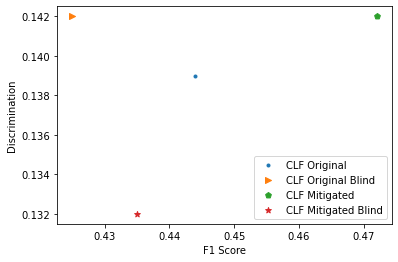

In [37]:
plotDisc(res)

In [38]:
FATInput=DataDescription(X_test,y_test,class_names,column_names,protected,protected_feature)

The grouping based on the *foreigners* feature has the following distribution:
    * "('foreign_worker_no',)" grouping has 12 instances.
    * "('foreign_worker_yes',)" grouping has 288 instances.

The class distribution per sub-population:
    * For the "('foreign_worker_no',)" grouping the classes are distributed as follows:
        - The class *Good* has 11 data points.
        - The class *Bad* has 1 data points.
    * For the "('foreign_worker_yes',)" grouping the classes are distributed as follows:
        - The class *Good* has 203 data points.
        - The class *Bad* has 85 data points.


In [39]:
resDisparateImp=disparateImpactMetrics(clfs,FATInput,X_test,X_test_blind,y_test,protected_feature)
resDisparateImp

The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fairness metric for *foreigners* feature split are:
The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fairness metric for *foreigners* feature split are:
The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fairness metric for *foreigners* feature split are:
The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fair

{'Equal Accuracy': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Equal Opportunity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Demographic Parity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []}}

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


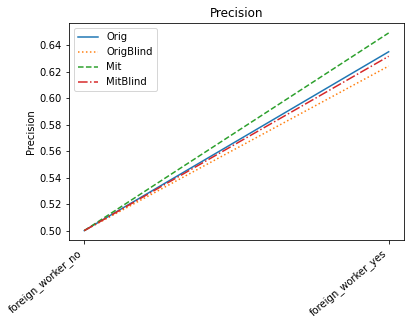

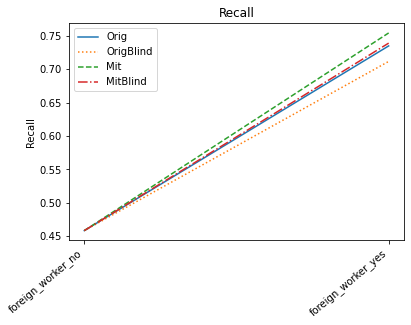

In [40]:
standardMetricsPerGroup(clfs,column_names,target,X_test,y_test,protected_feature,protected)

#### XAI Fixed Reference Set

##### SHAP Kernel Explainer

In [41]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [42]:
PIK = "US_RF_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [9]:
PIK = "US_RF_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [10]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

""


In [11]:
XAIMean

,clfOrig-clfOrigBlind,clfMit-clfMitBlind,clfOrig-clfMit,clfOrigBlind-clfMitBlind
account_check_status,0.007229,0.005057,0.005710,0.007608
duration_in_month,0.004628,0.005166,0.008099,0.007082
credit_history,0.004572,0.003798,0.004755,0.005232
purpose,0.007666,0.007733,0.007392,0.009964
credit_amount,0.004242,0.004440,0.003275,0.005876
savings,0.004794,0.005557,0.006167,0.004723
present_emp_since,0.003577,0.003300,0.003702,0.003214
installment_as_income_perc,0.002564,0.003088,0.003888,0.003710
personal_status_sex,0.003675,0.002975,0.003899,0.002691
other_debtors,0.002177,0.002234,0.002190,0.002402


In [12]:
EValues = computeE(shap_v,column_names)
EValues 

,E
clfOrig-clfOrigBlind,0.003
clfMit-clfMitBlind,0.003
clfOrig-clfMit,0.003
clfOrigBlind-clfMitBlind,0.003


In [13]:
resSHAP = pd.read_csv(path_res+'US_RF_ResSHAP_Fix.csv',index_col=0)
resSHAP.to_csv(path_or_buf=path_res+'US_RF_ResSHAP_Fix.csv')
resSHAP

,clfOrig-clfOrigBlind,clfMit-clfMitBlind,clfOrig-clfMit,clfOrigBlind-clfMitBlind
SA-Sum,0.165,0.069,0.234,0.001
SA-Mean,0.001,0.000,0.000,0.000
NSA-Sum,3.733,3.647,3.880,3.500
NSA-Mean,0.004,0.004,0.005,0.004


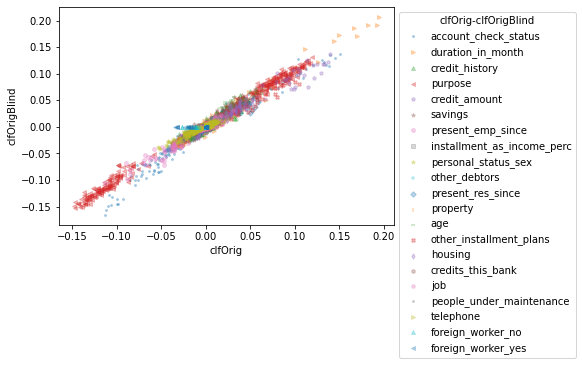

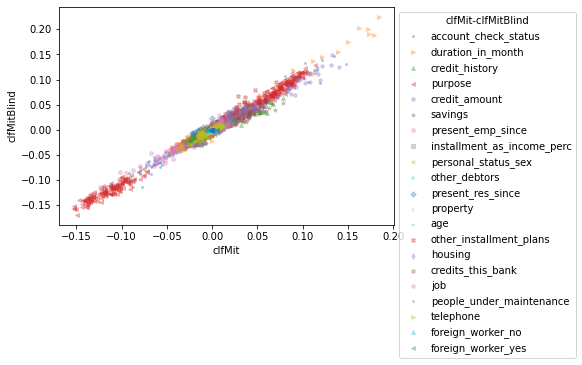

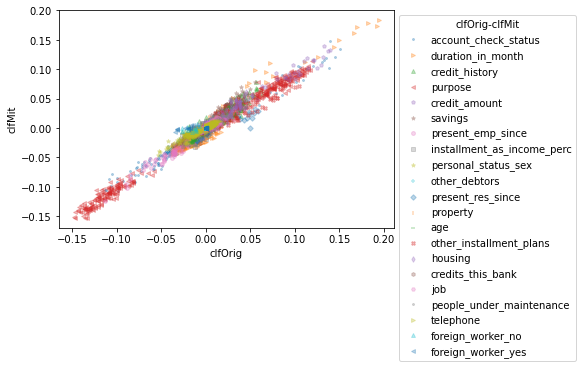

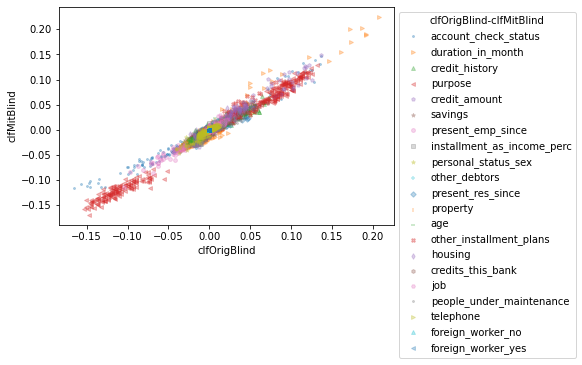

In [50]:
XAIPlots(shap_v,column_names,diffClfs=True)

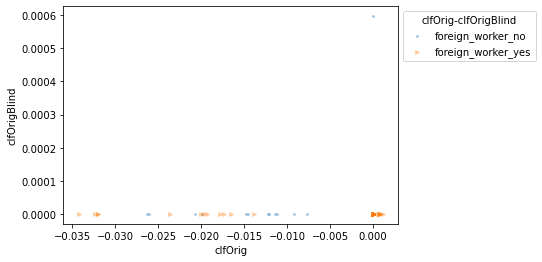

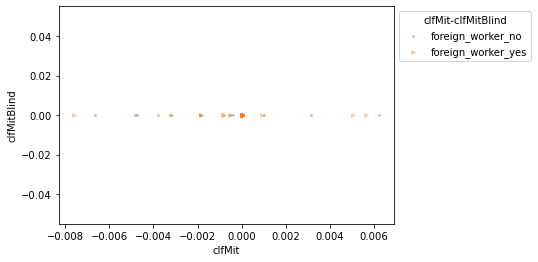

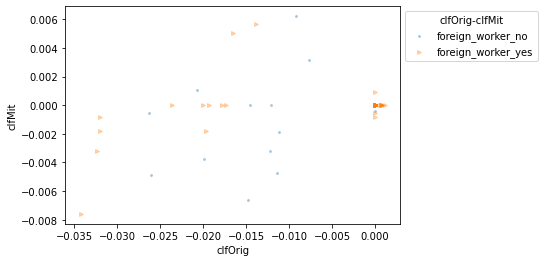

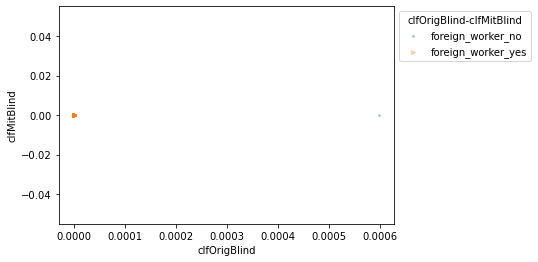

In [51]:
XAIPlots(shap_v,protected,diffClfs=True)

##### SHAP Explainer 4 Trees

In [ ]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False,Tree=True)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [ ]:
PIK = "US_RF_SHAPV_Fix_Tree.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [ ]:
PIK = "US_RF_SHAPV_Fix_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

In [ ]:
XAIMean

In [ ]:
EValues = computeE(shap_v,column_names)
EValues 

In [ ]:
resSHAP = pd.read_csv(path_res+'US_RF_ResSHAP_Fix_Tree.csv',index_col=0)
resSHAP = resSHAP.round(3)
resSHAP.to_csv(path_or_buf=path_res+'US_RF_ResSHAP_Fix_Tree.csv')
resSHAP

In [ ]:
XAIPlots(shap_v,column_names,diffClfs=True)

In [ ]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [ ]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [ ]:
PIK = "US_RF_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [ ]:
PIK = "US_RF_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

In [ ]:
XAIMean

In [ ]:
EValues = computeE(lime_v,column_names)
EValues 

In [ ]:
resLIME = pd.read_csv(path_res+'US_RF_ResLIME_Fix.csv',index_col=0)
resLIME = resLIME.round(3)
resLIME.to_csv(path_or_buf=path_res+'US_RF_ResLIME_Fix.csv')
resLIME

In [ ]:
XAIPlots(lime_v,column_names,diffClfs=True)

In [ ]:
XAIPlots(lime_v,protected,diffClfs=True)

#### XAI Changing Reference Set

##### SHAP Kernel Explainer

In [ ]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [ ]:
PIK = "US_RF_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [ ]:
PIK = "US_RF_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

In [ ]:
XAIMean

In [ ]:
EValues = computeE(shap_v,column_names)
EValues 

In [ ]:
resSHAP = pd.read_csv(path_res+'US_RF_ResSHAP_Change.csv',index_col=0)
resSHAP = resSHAP.round(3)
resSHAP.to_csv(path_or_buf=path_res+'US_RF_ResSHAP_Change.csv')
resSHAP

In [ ]:
XAIPlots(shap_v,column_names,diffClfs=True)

In [ ]:
XAIPlots(shap_v,protected,diffClfs=True)

##### SHAP Explainer 4 Trees

In [ ]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True,Tree=True)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [ ]:
PIK = "US_RF_SHAPV_Change_Tree.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [ ]:
PIK = "US_RF_SHAPV_Change_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

In [ ]:
XAIMean

In [ ]:
EValues = computeE(shap_v,column_names)
EValues 

In [ ]:
resSHAP = pd.read_csv(path_res+'US_RF_ResSHAP_Change_Tree.csv',index_col=0)
resSHAP = resSHAP.round(3)
resSHAP.to_csv(path_or_buf=path_res+'US_RF_ResSHAP_Change_Tree.csv')
resSHAP

In [ ]:
XAIPlots(shap_v,column_names,diffClfs=True)

In [ ]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [ ]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [ ]:
PIK = "US_RF_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [ ]:
PIK = "US_RF_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

In [ ]:
XAIMean

In [ ]:
EValues = computeE(lime_v,column_names)
EValues 

In [ ]:
resLIME = pd.read_csv(path_res+'US_RF_ResLIME_Change.csv',index_col=0)
resLIME = resLIME.round(3)
resLIME.to_csv(path_or_buf=path_res+'US_RF_ResLIME_Change.csv')
resLIME

In [ ]:
XAIPlots(lime_v,column_names,diffClfs=True)

In [ ]:
XAIPlots(lime_v,protected,diffClfs=True)

#### Comparison

##### SHAP Kernel Explainer

In [ ]:
PIK = "US_RF_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_fix = pickle.load(f)

In [ ]:
PIK = "US_RF_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_change = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(shap_v_fix,column_names,False,shap_v_change)
XAISum

In [ ]:
XAIMean

In [ ]:
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resSHAP = resSHAP.round(3)
resSHAP

In [ ]:
XAIPlots(shap_v_fix,protected,True,shap_v_change)

##### SHAP Explainer 4 Trees

In [ ]:
PIK = "US_RF_SHAPV_Fix_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_fix = pickle.load(f)

In [ ]:
PIK = "US_RF_SHAPV_Change_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_change = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(shap_v_fix,column_names,False,shap_v_change)
XAISum

In [ ]:
XAIMean

In [ ]:
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resSHAP = resSHAP.round(3)
resSHAP

In [ ]:
XAIPlots(shap_v_fix,protected,True,shap_v_change)

##### LIME

In [ ]:
PIK = "US_RF_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_fix = pickle.load(f)

In [ ]:
PIK = "US_RF_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_change = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(lime_v_fix,column_names,False,lime_v_change)
XAISum

In [ ]:
XAIMean

In [ ]:
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resLIME = resLIME.round(3)
resLIME

In [ ]:
XAIPlots(lime_v_fix,protected,True,lime_v_change)

## Preferential Sampling

In [ ]:
filename = 'german_credit.csv'
path_res = '/Users/Marta/FAccT/Res-GERMAN/'
path_data = 'datasets/'
sensitive = ['foreign_worker'] #OR personal_status_sex
discrete,df = prepare_german_dataset(filename, path_data, sensitive)
discrete

In [ ]:
target = 'target'
column_names = df.columns.values.tolist()
column_names.remove(target)
class_names=['Good','Bad']
#There are two classes, 1 for good customers and 2 for bad customers
#in LORE 0 sta per 1 e 1 sta per 2, quindi 0 è good e 1 è bad  
adClass=0
disClass=1
protected = ['foreign_worker_no','foreign_worker_yes']
protected_feature='foreigners' 
non_sensitive = [elem for elem in column_names if elem not in protected]
adAttr=None
disAttr=None

In [ ]:
discrete.append('foreign_worker_no')
discrete.append('foreign_worker_yes')
discrete.append('target')
df_Discrete = df.loc[:, df.columns.isin(discrete)]
df_Discrete

In [ ]:
from sklearn.preprocessing import StandardScaler

df_ToScale = df.loc[:, ~df.columns.isin(discrete)]
df_ToScale

scaler = StandardScaler()

df_ToScale = scaler.fit_transform(df_ToScale)
df_ToScale = pd.DataFrame(df_ToScale)
df_ToScale.columns = range(0, df_ToScale.columns.size)
df_ToScale.columns = ['duration_in_month','credit_amount','age']
df_ToScale

In [ ]:
df = pd.concat([df_ToScale.reset_index(drop=True), df_Discrete.reset_index(drop=True)], axis= 1)
df

In [ ]:
X,Y,X_blind,X_train,X_test,y_train,y_test,df=prepare_for_sampling(df,protected)

In [ ]:
findFreq(target,protected,df)

In [52]:
blind,ranker = rankers(X,X_blind,Y)

Non-Blind Rankers
GaussianNB(var_smoothing=0.03511191734215131)
LogisticRegression(C=0.012742749857031334, solver='liblinear')
RandomForestClassifier(bootstrap=False, max_depth=8, max_features='log2',
                       n_estimators=500)


The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.


SVC(C=1, gamma=0.1, probability=True)
Non-Blind Rankers Evaluation
           Gaussian Naive Bayes  Calibrated Gaussian Naive Bayes  \
Accuracy               0.726000                         0.721000   
Precision              0.580118                         0.574799   
Recall                 0.336667                         0.263333   
F1 Score               0.423325                         0.357628   

           Logistic Regression  Calibrated Logistic Regression  Random Forest  \
Accuracy              0.735000                        0.735000       0.741000   
Precision             0.680163                        0.628517       0.662981   
Recall                0.233333                        0.293333       0.293333   
F1 Score              0.343705                        0.397795       0.402517   

           Calibrated Random Forest  Support Vector Classifier  \
Accuracy                   0.756000                   0.737000   
Precision                  0.660873                   

The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.


SVC(C=1, gamma=0.1, probability=True)
Blind Rankers Evaluation
           Blind Gaussian Naive Bayes  Blind Calibrated Gaussian Naive Bayes  \
Accuracy                     0.722000                               0.723000   
Precision                    0.576776                               0.583762   
Recall                       0.290000                               0.256667   
F1 Score                     0.383007                               0.353805   

           Blind Logistic Regression  Blind Calibrated Logistic Regression  \
Accuracy                    0.733000                              0.734000   
Precision                   0.671830                              0.626055   
Recall                      0.230000                              0.290000   
F1 Score                    0.338943                              0.394074   

           Blind Random Forest  Blind Calibrated Random Forest  \
Accuracy              0.736000                        0.756000   
Precision    

In [53]:

PIK = "Ranker.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(ranker, f)

In [54]:
PIK = "Ranker.dat"
with open(path_res+"/"+PIK, "rb") as f:
  ranker = pickle.load(f)

In [55]:
df_new=PreferentialSampling(target,protected,ranker,blind,df,adClass,disClass,adAttr,disAttr)

Counting labels = 0  {'foreign_worker_no': 22, 'foreign_worker_yes': 464}
Counting labels = 1  {'foreign_worker_no': 3, 'foreign_worker_yes': 211}
DN  ('foreign_worker_yes', 211)
FP  ('foreign_worker_no', 22)
DP  ('foreign_worker_yes', 464)
FN  ('foreign_worker_no', 3)
Len DN_df  211
Len FP_df  22
Len DP_df  464
Len FN_df  3
Len restData 0


elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


DN_expected  206
5 to be removed
Len DN_df after sampling  206
FP_expected  17
5 to be removed
Len FP_df after sampling  17
DP_expected  469
5 to add
Len DP_df after sampling  469
FN_expected  8
5 to add
Len FN_df after sampling  8


In [56]:
findFreq(target,protected,df_new)

({'foreign_worker_no': 17, 'foreign_worker_yes': 469},
 {'foreign_worker_no': 8, 'foreign_worker_yes': 206})

In [57]:
X_train,X_train_blind,X_train_mod,X_train_mod_blind,y_train_mod,X_test,X_test_blind=prepare_for_classification(df_new,X_train,X_test,column_names,protected,True)

### MLP

In [58]:

clf = MLPClassifier()
param_grid = dict(hidden_layer_sizes=[(50, 50, 50), (50, 100, 50)],
                          activation=['tanh', 'relu'],
                          solver=['sgd', 'adam'],
                          alpha=[0.0001, 0.05],
                          learning_rate=['constant', 'adaptive']
                          )

In [59]:

clfOrig,clfOrigBlind,clfMit,clfMitBlind,res = Classifiers(clf,param_grid,target,column_names,X_train,X_train_mod,X_train_blind,X_train_mod_blind,y_train,y_train_mod,X_test,X_test_blind,y_test,protected,adClass,disClass,adAttr,disAttr)
res.to_csv(path_or_buf=path_res+'PS_MLP_Performances.csv')
res

Original Train Dimension = 700
Mitigated Train Dimension = 700
Test Dimension = 300


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer

---> CLF Original: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 229 ]
---> CLF Mitigated: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 223 ]
---> CLF Original Blind: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 224 ]
---> CLF Mitigated Blind: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 226 ]


,CLF Original,CLF Original Blind,CLF Mitigated,CLF Mitigated Blind,Best Score,Delta O-OB,Delta M-MB,Delta O-M,Delta OB-MB
F1 Score,0.496552,0.426667,0.463576,0.445946,CLF Original,0.069885,0.017630,0.032976,0.019279
Discrimination,0.204861,0.222222,0.225694,0.215278,CLF Original,0.017361,0.010417,0.020833,0.006944


In [60]:

PIK = "PS_Clfs_MLP.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump([clfOrig,clfOrigBlind,clfMit,clfMitBlind], f)

In [61]:
PIK = "PS_Clfs_MLP.dat"
with open(path_res+"/"+PIK, "rb") as f:
  clfOrig,clfOrigBlind,clfMit,clfMitBlind = pickle.load(f)
clfs={'clfOrig':clfOrig,'clfOrigBlind':clfOrigBlind,'clfMit':clfMit,'clfMitBlind':clfMitBlind}

In [62]:
res = pd.read_csv(path_res+'PS_MLP_Performances.csv',index_col=0)
res = res.round(3)
res.to_csv(path_res+'PS_MLP_Performances.csv')
res

,CLF Original,CLF Original Blind,CLF Mitigated,CLF Mitigated Blind,Best Score,Delta O-OB,Delta M-MB,Delta O-M,Delta OB-MB
F1 Score,0.497,0.427,0.464,0.446,CLF Original,0.070,0.018,0.033,0.019
Discrimination,0.205,0.222,0.226,0.215,CLF Original,0.017,0.010,0.021,0.007


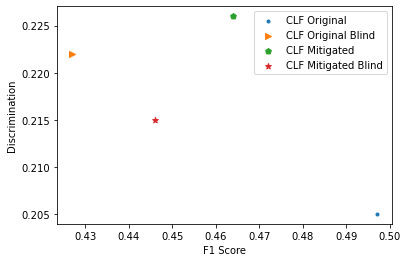

In [63]:
plotDisc(res)

In [64]:
FATInput=DataDescription(X_test,y_test,class_names,column_names,protected,protected_feature)

The grouping based on the *foreigners* feature has the following distribution:
    * "('foreign_worker_no',)" grouping has 12 instances.
    * "('foreign_worker_yes',)" grouping has 288 instances.

The class distribution per sub-population:
    * For the "('foreign_worker_no',)" grouping the classes are distributed as follows:
        - The class *Good* has 11 data points.
        - The class *Bad* has 1 data points.
    * For the "('foreign_worker_yes',)" grouping the classes are distributed as follows:
        - The class *Good* has 203 data points.
        - The class *Bad* has 85 data points.


In [65]:
resDisparateImp=disparateImpactMetrics(clfs,FATInput,X_test,X_test_blind,y_test,protected_feature)
resDisparateImp

The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fairness metric for *foreigners* feature split are:
The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
    *  NOT  satisfied for "('foreign_worker_no',)" and "('foreign_worker_yes',)" sub-populations.
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fairness metric for *foreigners* feature split are:
The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fairness metric for *foreigners* feature split are:
The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-b

{'Equal Accuracy': {'Delta O-OB': ["'foreign_worker_no' 'foreign_worker_yes' "],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': ["'foreign_worker_no' 'foreign_worker_yes' "]},
 'Equal Opportunity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Demographic Parity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []}}

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


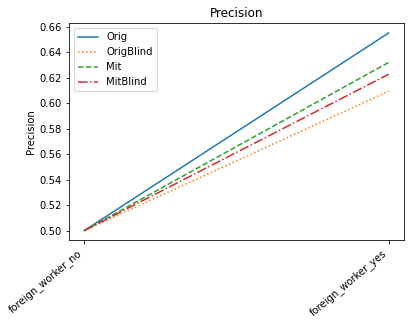

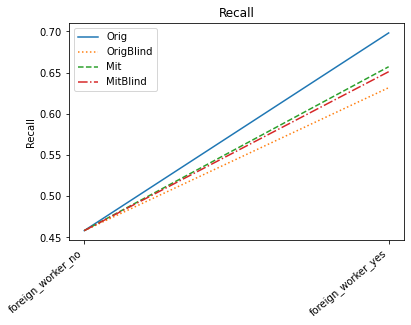

In [66]:
standardMetricsPerGroup(clfs,column_names,target,X_test,y_test,protected_feature,protected)

#### XAI Fixed Reference Set

##### SHAP Kernel Explainer

In [67]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [68]:
PIK = "PS_MLP_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [14]:
PIK = "PS_MLP_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [15]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

""


In [16]:
XAIMean

,clfOrig-clfOrigBlind,clfMit-clfMitBlind,clfOrig-clfMit,clfOrigBlind-clfMitBlind
account_check_status,0.009574,0.016866,0.009346,0.017403
duration_in_month,0.029500,0.017341,0.023637,0.010829
credit_history,0.004755,0.004758,0.007968,0.009127
purpose,0.016982,0.010013,0.015043,0.012289
credit_amount,0.005080,0.009467,0.004828,0.007099
savings,0.016808,0.014508,0.018368,0.012585
present_emp_since,0.007897,0.007768,0.009714,0.007897
installment_as_income_perc,0.007855,0.008705,0.005898,0.008817
personal_status_sex,0.036741,0.009980,0.030670,0.007911
other_debtors,0.011172,0.008090,0.008241,0.010929


In [17]:
EValues = computeE(shap_v,column_names)
EValues 

,E
clfOrig-clfOrigBlind,0.011
clfMit-clfMitBlind,0.010
clfOrig-clfMit,0.012
clfOrigBlind-clfMitBlind,0.010


In [18]:
resSHAP = pd.read_csv(path_res+'PS_MLP_ResSHAP_Fix.csv',index_col=0)
resSHAP.to_csv(path_or_buf=path_res+'PS_MLP_ResSHAP_Fix.csv')
resSHAP

,clfOrig-clfOrigBlind,clfMit-clfMitBlind,clfOrig-clfMit,clfOrigBlind-clfMitBlind
SA-Sum,0.000,0.018,0.017,0.000
SA-Mean,0.000,0.000,0.000,0.000
NSA-Sum,0.004,1.015,1.059,0.079
NSA-Mean,0.000,0.008,0.008,0.001


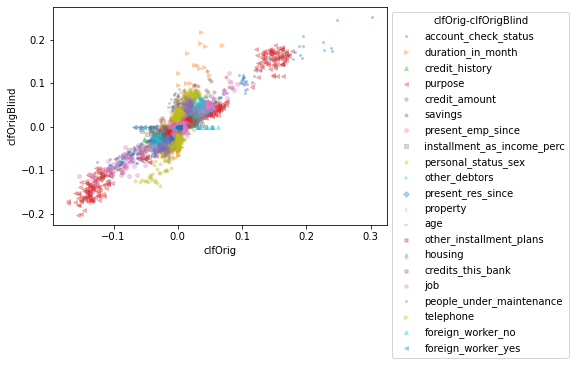

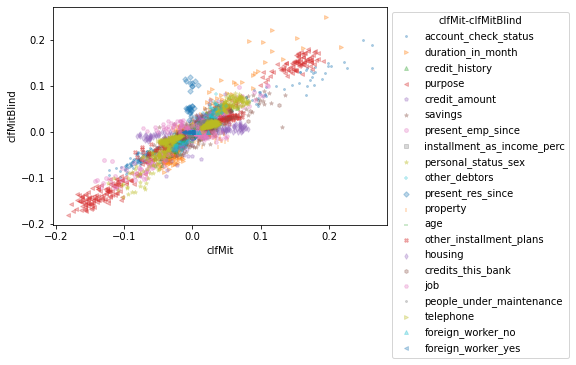

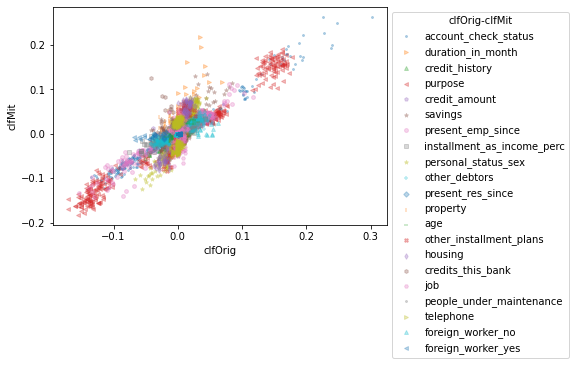

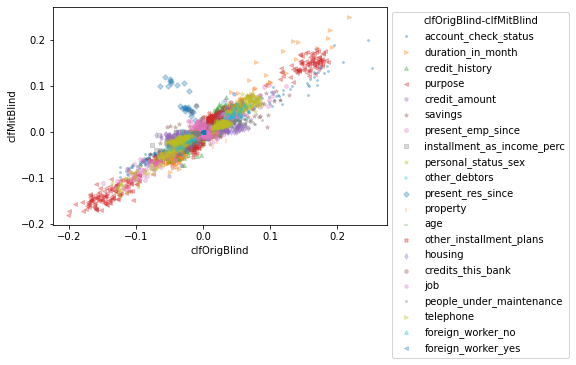

In [76]:
XAIPlots(shap_v,column_names,diffClfs=True)

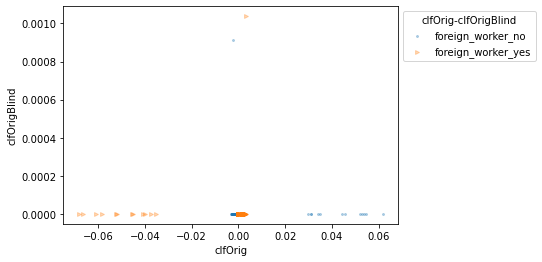

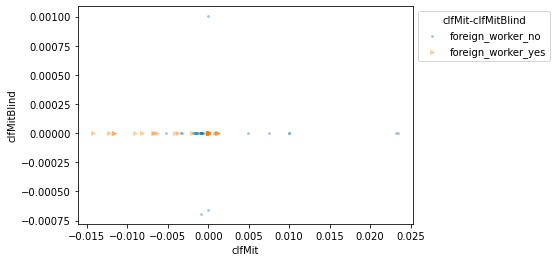

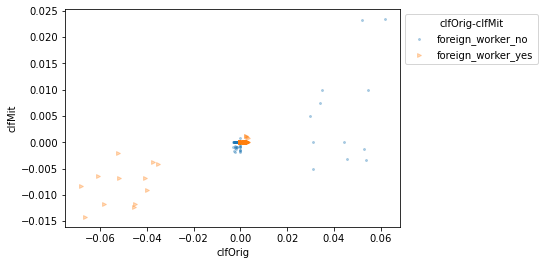

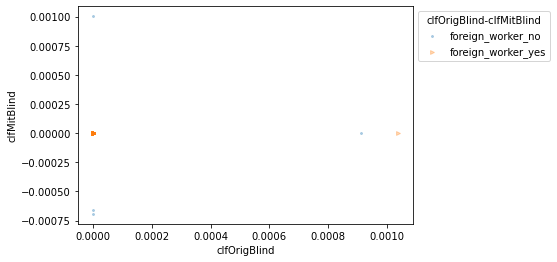

In [77]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [ ]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [ ]:
PIK = "PS_MLP_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [ ]:
PIK = "PS_MLP_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

In [ ]:
XAIMean

In [ ]:
EValues = computeE(lime_v,column_names)
EValues 

In [ ]:
resLIME = pd.read_csv(path_res+'PS_MLP_ResLIME_Fix.csv',index_col=0)
resLIME = resLIME.round(3)
resLIME.to_csv(path_or_buf=path_res+'PS_MLP_ResLIME_Fix.csv')
resLIME

In [ ]:
XAIPlots(lime_v,column_names,diffClfs=True)

In [ ]:
XAIPlots(lime_v,protected,diffClfs=True)

#### XAI Changing Reference Set

##### SHAP Kernel Explainer

In [ ]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [ ]:
PIK = "PS_MLP_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [ ]:
PIK = "PS_MLP_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

In [ ]:
XAIMean

In [ ]:
EValues = computeE(shap_v,column_names)
EValues 

In [ ]:
resSHAP = pd.read_csv(path_res+'PS_MLP_ResSHAP_Change.csv',index_col=0)
resSHAP = resSHAP.round(3)
resSHAP.to_csv(path_or_buf=path_res+'PS_MLP_ResSHAP_Change.csv')
resSHAP

In [ ]:
XAIPlots(shap_v,column_names,diffClfs=True)

In [ ]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [ ]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [ ]:
PIK = "PS_MLP_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [ ]:
PIK = "PS_MLP_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

In [ ]:
XAIMean

In [ ]:
EValues = computeE(lime_v,column_names)
EValues 

In [ ]:
resLIME = pd.read_csv(path_res+'PS_MLP_ResLIME_Change.csv',index_col=0)
resLIME = resLIME.round(3)
resLIME.to_csv(path_or_buf=path_res+'PS_MLP_ResLIME_Change.csv')
resLIME

In [ ]:
XAIPlots(lime_v,column_names,diffClfs=True)

In [ ]:
XAIPlots(lime_v,protected,diffClfs=True)

#### Comparison

##### SHAP Kernel Explainer

In [ ]:
PIK = "PS_MLP_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_fix = pickle.load(f)

In [ ]:
PIK = "PS_MLP_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_change = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(shap_v_fix,column_names,False,shap_v_change)
XAISum

In [ ]:
XAIMean

In [ ]:
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resSHAP = resSHAP.round(3)
resSHAP

In [ ]:
XAIPlots(shap_v_fix,protected,True,shap_v_change)

##### LIME

In [ ]:
PIK = "PS_MLP_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_fix = pickle.load(f)

In [ ]:
PIK = "PS_MLP_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_change = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(lime_v_fix,column_names,False,lime_v_change)
XAISum

In [ ]:
XAIMean

In [ ]:
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resLIME = resLIME.round(3)
resLIME

In [ ]:
XAIPlots(lime_v_fix,protected,True,lime_v_change)

### RF

In [78]:

clf = RandomForestClassifier()
param_grid = {'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth' : [4,5,6,7,8], 'criterion' : ['gini', 'entropy'], 'bootstrap' : [True, False]}

In [79]:

clfOrig,clfOrigBlind,clfMit,clfMitBlind,res = Classifiers(clf,param_grid,target,column_names,X_train,X_train_mod,X_train_blind,X_train_mod_blind,y_train,y_train_mod,X_test,X_test_blind,y_test,protected,adClass,disClass,adAttr,disAttr)
res.to_csv(path_or_buf=path_res+'PS_RF_Performances.csv')
res

Original Train Dimension = 700
Mitigated Train Dimension = 700
Test Dimension = 300
---> CLF Original: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 239 ]
---> CLF Mitigated: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 248 ]
---> CLF Original Blind: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 246 ]
---> CLF Mitigated Blind: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 245 ]


,CLF Original,CLF Original Blind,CLF Mitigated,CLF Mitigated Blind,Best Score,Delta O-OB,Delta M-MB,Delta O-M,Delta OB-MB
F1 Score,0.488889,0.437500,0.444444,0.480620,CLF Original,0.051389,0.036176,0.044444,0.043120
Discrimination,0.170139,0.145833,0.138889,0.149306,CLF Mitigated,0.024306,0.010417,0.031250,0.003472


In [80]:

PIK = "PS_Clfs_RF.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump([clfOrig,clfOrigBlind,clfMit,clfMitBlind], f)

In [81]:
PIK = "PS_Clfs_RF.dat"
with open(path_res+"/"+PIK, "rb") as f:
  clfOrig,clfOrigBlind,clfMit,clfMitBlind = pickle.load(f)
clfs={'clfOrig':clfOrig,'clfOrigBlind':clfOrigBlind,'clfMit':clfMit,'clfMitBlind':clfMitBlind}

In [82]:
res = pd.read_csv(path_res+'PS_RF_Performances.csv',index_col=0)
res = res.round(3)
res.to_csv(path_res+'PS_RF_Performances.csv')
res

,CLF Original,CLF Original Blind,CLF Mitigated,CLF Mitigated Blind,Best Score,Delta O-OB,Delta M-MB,Delta O-M,Delta OB-MB
F1 Score,0.489,0.438,0.444,0.481,CLF Original,0.051,0.036,0.044,0.043
Discrimination,0.170,0.146,0.139,0.149,CLF Mitigated,0.024,0.010,0.031,0.003


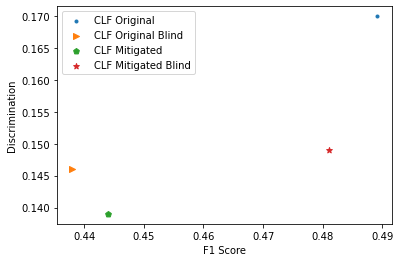

In [83]:
plotDisc(res)

In [84]:
FATInput=DataDescription(X_test,y_test,class_names,column_names,protected,protected_feature)

The grouping based on the *foreigners* feature has the following distribution:
    * "('foreign_worker_no',)" grouping has 12 instances.
    * "('foreign_worker_yes',)" grouping has 288 instances.

The class distribution per sub-population:
    * For the "('foreign_worker_no',)" grouping the classes are distributed as follows:
        - The class *Good* has 11 data points.
        - The class *Bad* has 1 data points.
    * For the "('foreign_worker_yes',)" grouping the classes are distributed as follows:
        - The class *Good* has 203 data points.
        - The class *Bad* has 85 data points.


In [85]:
resDisparateImp=disparateImpactMetrics(clfs,FATInput,X_test,X_test_blind,y_test,protected_feature)
resDisparateImp

The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fairness metric for *foreigners* feature split are:
The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fairness metric for *foreigners* feature split are:
The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fairness metric for *foreigners* feature split are:
The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fair

{'Equal Accuracy': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Equal Opportunity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Demographic Parity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []}}

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


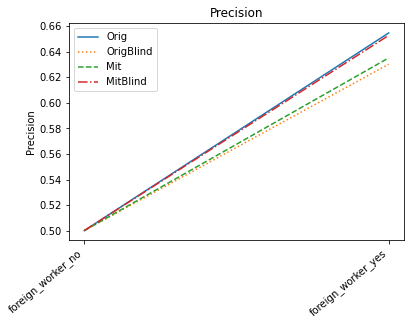

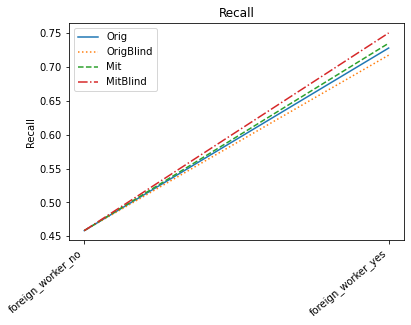

In [86]:
standardMetricsPerGroup(clfs,column_names,target,X_test,y_test,protected_feature,protected)

#### XAI Fixed Reference Set

##### SHAP Kernel Explainer

In [87]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [88]:
PIK = "PS_RF_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [19]:
PIK = "PS_RF_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [20]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

""


In [21]:
XAIMean

,clfOrig-clfOrigBlind,clfMit-clfMitBlind,clfOrig-clfMit,clfOrigBlind-clfMitBlind
account_check_status,0.009608,0.009216,0.015634,8.253535e-03
duration_in_month,0.012041,0.006236,0.010031,7.971433e-03
credit_history,0.004685,0.004018,0.005613,6.677352e-03
purpose,0.008987,0.008377,0.009272,1.004382e-02
credit_amount,0.005003,0.004446,0.006886,5.565632e-03
savings,0.005000,0.004426,0.005824,5.345431e-03
present_emp_since,0.006997,0.003825,0.005853,3.690334e-03
installment_as_income_perc,0.002625,0.003060,0.002942,2.699487e-03
personal_status_sex,0.002365,0.003298,0.004331,4.691959e-03
other_debtors,0.001927,0.002472,0.002193,2.008564e-03


In [22]:
EValues = computeE(shap_v,column_names)
EValues 

,E
clfOrig-clfOrigBlind,0.004
clfMit-clfMitBlind,0.003
clfOrig-clfMit,0.004
clfOrigBlind-clfMitBlind,0.004


In [23]:
resSHAP = pd.read_csv(path_res+'PS_RF_ResSHAP_Fix.csv',index_col=0)
resSHAP.to_csv(path_or_buf=path_res+'PS_RF_ResSHAP_Fix.csv')
resSHAP

,clfOrig-clfOrigBlind,clfMit-clfMitBlind,clfOrig-clfMit,clfOrigBlind-clfMitBlind
SA-Sum,0.165,0.120,0.074,0.001
SA-Mean,0.001,0.000,0.001,0.000
NSA-Sum,3.647,3.896,3.541,4.002
NSA-Mean,0.004,0.003,0.005,0.005


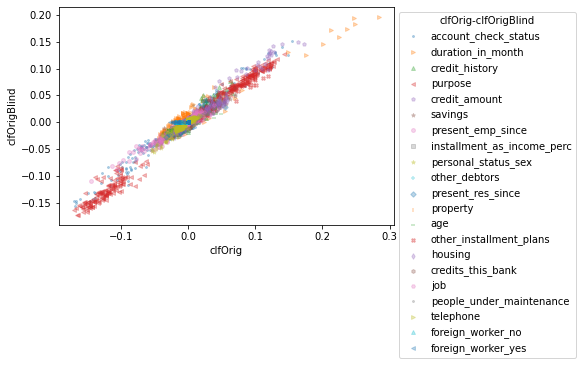

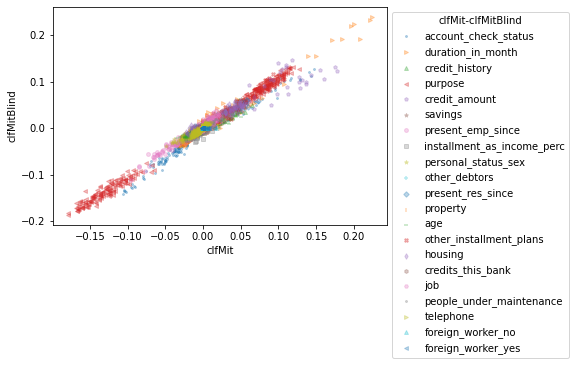

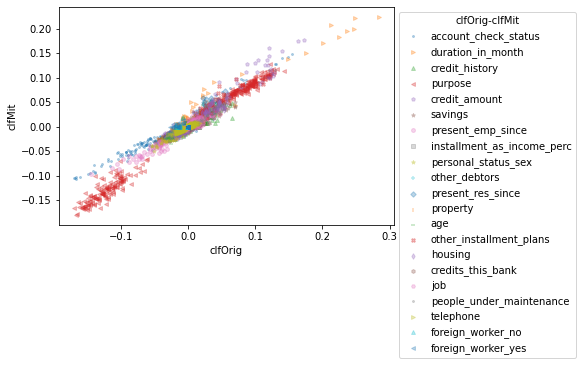

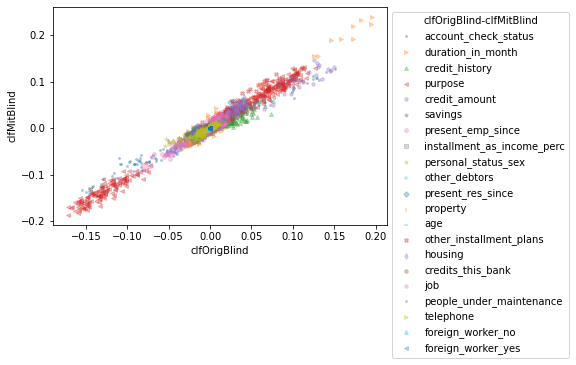

In [96]:
XAIPlots(shap_v,column_names,diffClfs=True)

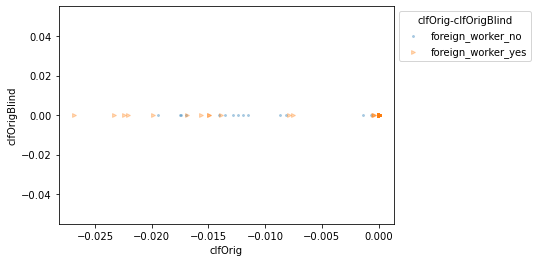

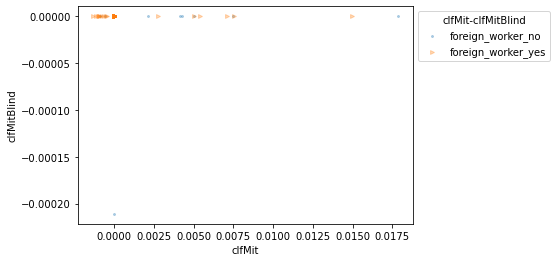

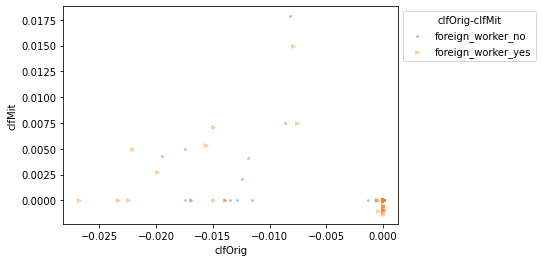

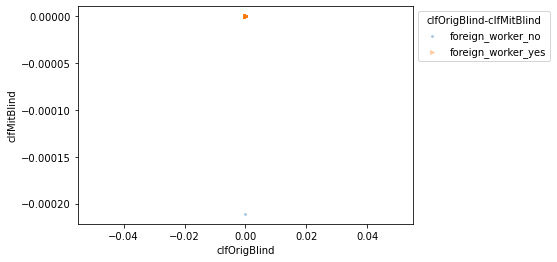

In [97]:
XAIPlots(shap_v,protected,diffClfs=True)

##### SHAP Explainer 4 Trees

In [ ]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False,Tree=True)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [ ]:
PIK = "PS_RF_SHAPV_Fix_Tree.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [ ]:
PIK = "PS_RF_SHAPV_Fix_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

In [ ]:
XAIMean

In [ ]:
EValues = computeE(shap_v,column_names)
EValues 

In [ ]:
resSHAP = pd.read_csv(path_res+'PS_RF_ResSHAP_Fix_Tree.csv',index_col=0)
resSHAP = resSHAP.round(3)
resSHAP.to_csv(path_or_buf=path_res+'PS_RF_ResSHAP_Fix_Tree.csv')
resSHAP

In [ ]:
XAIPlots(shap_v,column_names,diffClfs=True)

In [ ]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [ ]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [ ]:
PIK = "PS_RF_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [ ]:
PIK = "PS_RF_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

In [ ]:
XAIMean

In [ ]:
EValues = computeE(lime_v,column_names)
EValues 

In [ ]:
resLIME = pd.read_csv(path_res+'PS_RF_ResLIME_Fix.csv',index_col=0)
resLIME = resLIME.round(3)
resLIME.to_csv(path_or_buf=path_res+'PS_RF_ResLIME_Fix.csv')
resLIME

In [ ]:
XAIPlots(lime_v,column_names,diffClfs=True)

In [ ]:
XAIPlots(lime_v,protected,diffClfs=True)

#### XAI Changing Reference Set

##### SHAP Kernel Explainer

In [ ]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [ ]:
PIK = "PS_RF_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [ ]:
PIK = "PS_RF_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

In [ ]:
XAIMean

In [ ]:
EValues = computeE(shap_v,column_names)
EValues 

In [ ]:
resSHAP = pd.read_csv(path_res+'PS_RF_ResSHAP_Change.csv',index_col=0)
resSHAP = resSHAP.round(3)
resSHAP.to_csv(path_or_buf=path_res+'PS_RF_ResSHAP_Change.csv')
resSHAP

In [ ]:
XAIPlots(shap_v,column_names,diffClfs=True)

In [ ]:
XAIPlots(shap_v,protected,diffClfs=True)

##### SHAP Explainer 4 Trees

In [ ]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True,Tree=True)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [ ]:
PIK = "PS_RF_SHAPV_Change_Tree.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [ ]:
PIK = "PS_RF_SHAPV_Change_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

In [ ]:
XAIMean

In [ ]:
EValues = computeE(shap_v,column_names)
EValues 

In [ ]:
resSHAP = pd.read_csv(path_res+'PS_RF_ResSHAP_Change_Tree.csv',index_col=0)
resSHAP = resSHAP.round(3)
resSHAP.to_csv(path_or_buf=path_res+'PS_RF_ResSHAP_Change_Tree.csv')
resSHAP

In [ ]:
XAIPlots(shap_v,column_names,diffClfs=True)

In [ ]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [ ]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [ ]:
PIK = "PS_RF_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [ ]:
PIK = "PS_RF_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

In [ ]:
XAIMean

In [ ]:
EValues = computeE(lime_v,column_names)
EValues 

In [ ]:
resLIME = pd.read_csv(path_res+'PS_RF_ResLIME_Change.csv',index_col=0)
resLIME = resLIME.round(3)
resLIME.to_csv(path_or_buf=path_res+'PS_RF_ResLIME_Change.csv')
resLIME

In [ ]:
XAIPlots(lime_v,column_names,diffClfs=True)

In [ ]:
XAIPlots(lime_v,protected,diffClfs=True)

#### Comparison

##### SHAP Kernel Explainer

In [ ]:
PIK = "PS_RF_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_fix = pickle.load(f)

In [ ]:
PIK = "PS_RF_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_change = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(shap_v_fix,column_names,False,shap_v_change)
XAISum

In [ ]:
XAIMean

In [ ]:
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resSHAP = resSHAP.round(3)
resSHAP

In [ ]:
XAIPlots(shap_v_fix,protected,True,shap_v_change)

##### SHAP Explainer 4 Trees

In [ ]:
PIK = "PS_RF_SHAPV_Fix_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_fix = pickle.load(f)

In [ ]:
PIK = "PS_RF_SHAPV_Change_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_change = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(shap_v_fix,column_names,False,shap_v_change)
XAISum

In [ ]:
XAIMean

In [ ]:
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resSHAP = resSHAP.round(3)
resSHAP

In [ ]:
XAIPlots(shap_v_fix,protected,True,shap_v_change)

##### LIME

In [ ]:
PIK = "PS_RF_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_fix = pickle.load(f)

In [ ]:
PIK = "PS_RF_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_change = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(lime_v_fix,column_names,False,lime_v_change)
XAISum

In [ ]:
XAIMean

In [ ]:
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resLIME = resLIME.round(3)
resLIME

In [ ]:
XAIPlots(lime_v_fix,protected,True,lime_v_change)